# Setup

In [1]:
%run ../setup.ipynb 

# carico dati

In [2]:
# cartella dove ci sono i dati da analizzare
folder = "../setup_dati/"

# importo dati
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)

In [3]:
df_all = calcola_scarto(df_all)

# Analisi

In [4]:
dimensioni_da_analizzare = ["doc_completeness_index","doc_comprehensibility_index","doc_precision_index","doc_informativeness_index","doc_unbiasedness_index","doc_accuracy_index","doc_speaker's-trustworthiness_index","doc_confidence_index"]
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

### Rapporto tra frequenze relative

In [5]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_all, dimensioni_da_analizzare, quartili)
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra").sort_values(by=["dimensione"], ascending=True)
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
35,doc_accuracy_index,wrong_true,pvalue_quartile_sovra,0.006909,0.139326
33,doc_accuracy_index,correct_false,pvalue_quartile_sovra,0.013714,0.078780
30,doc_accuracy_index,wrong_false,pvalue_quartile_sovra,0.017761,0.536334
7,doc_comprehensibility_index,wrong_true,pvalue_quartile_sovra,0.046483,0.023365
50,doc_confidence_index,correct_false,pvalue_quartile_sovra,0.025301,0.067685
51,doc_confidence_index,wrong_true,pvalue_quartile_sovra,0.029073,0.020806
15,doc_informativeness_index,wrong_false,pvalue_quartile_sovra,0.002372,0.059583
19,doc_informativeness_index,wrong_true,pvalue_quartile_sovra,0.045200,0.016200
11,doc_precision_index,wrong_true,pvalue_quartile_sovra,0.044595,0.091103
44,doc_speaker's-trustworthiness_index,wrong_true,pvalue_quartile_sovra,0.000084,0.717686


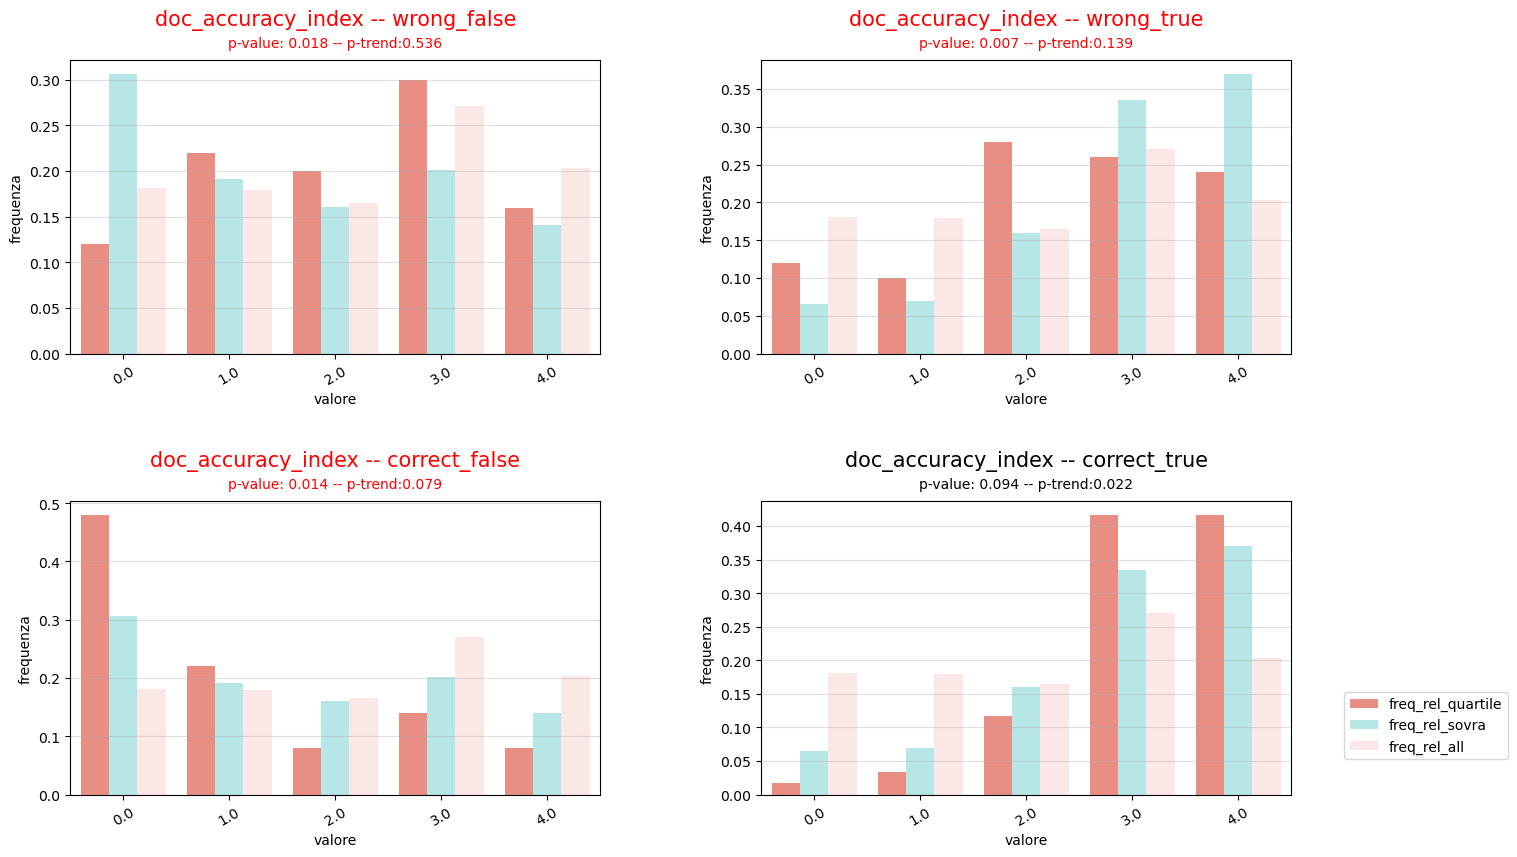

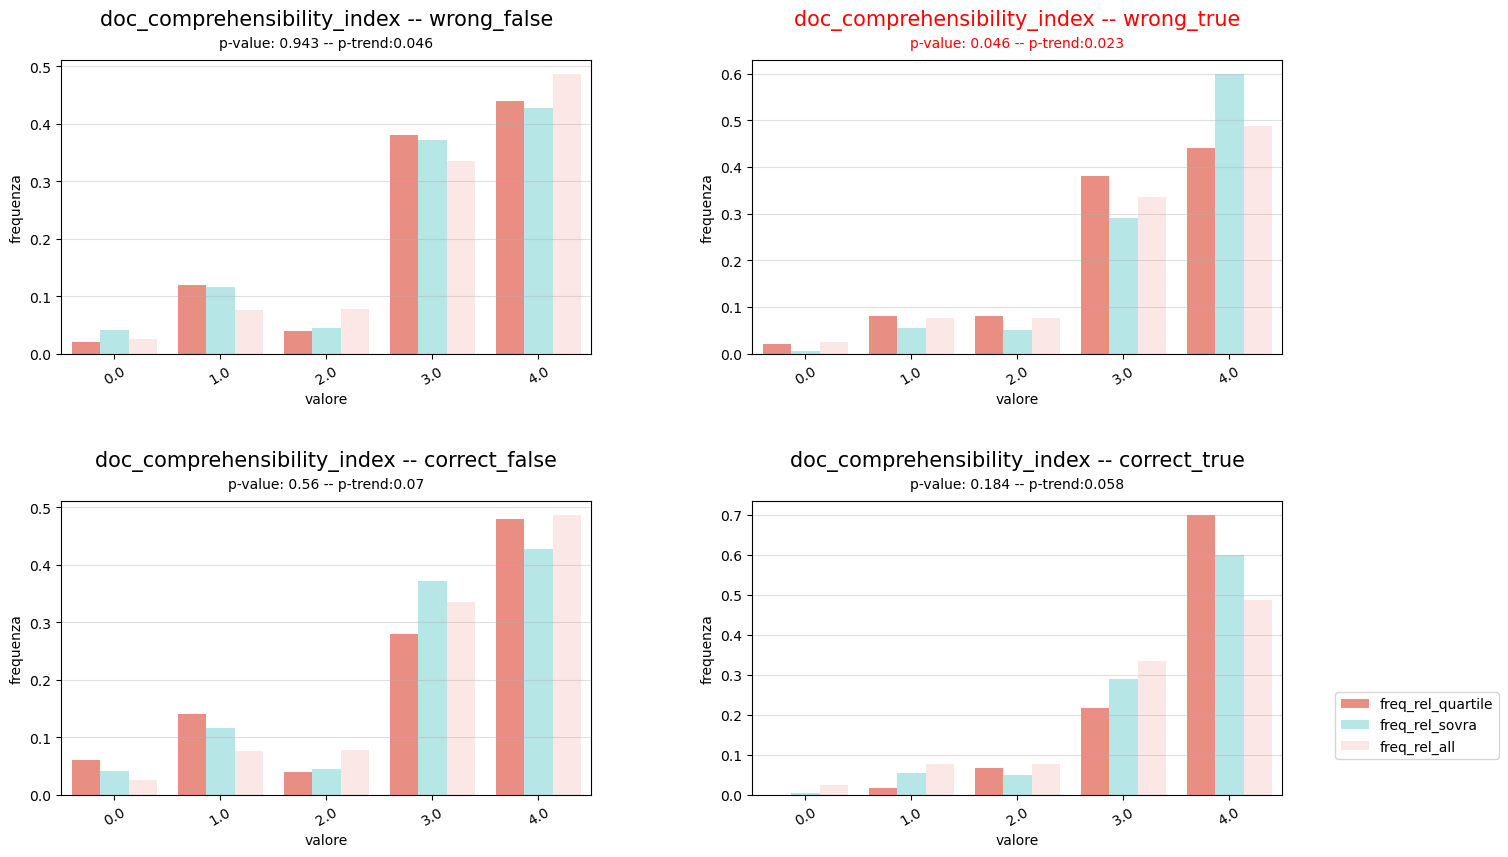

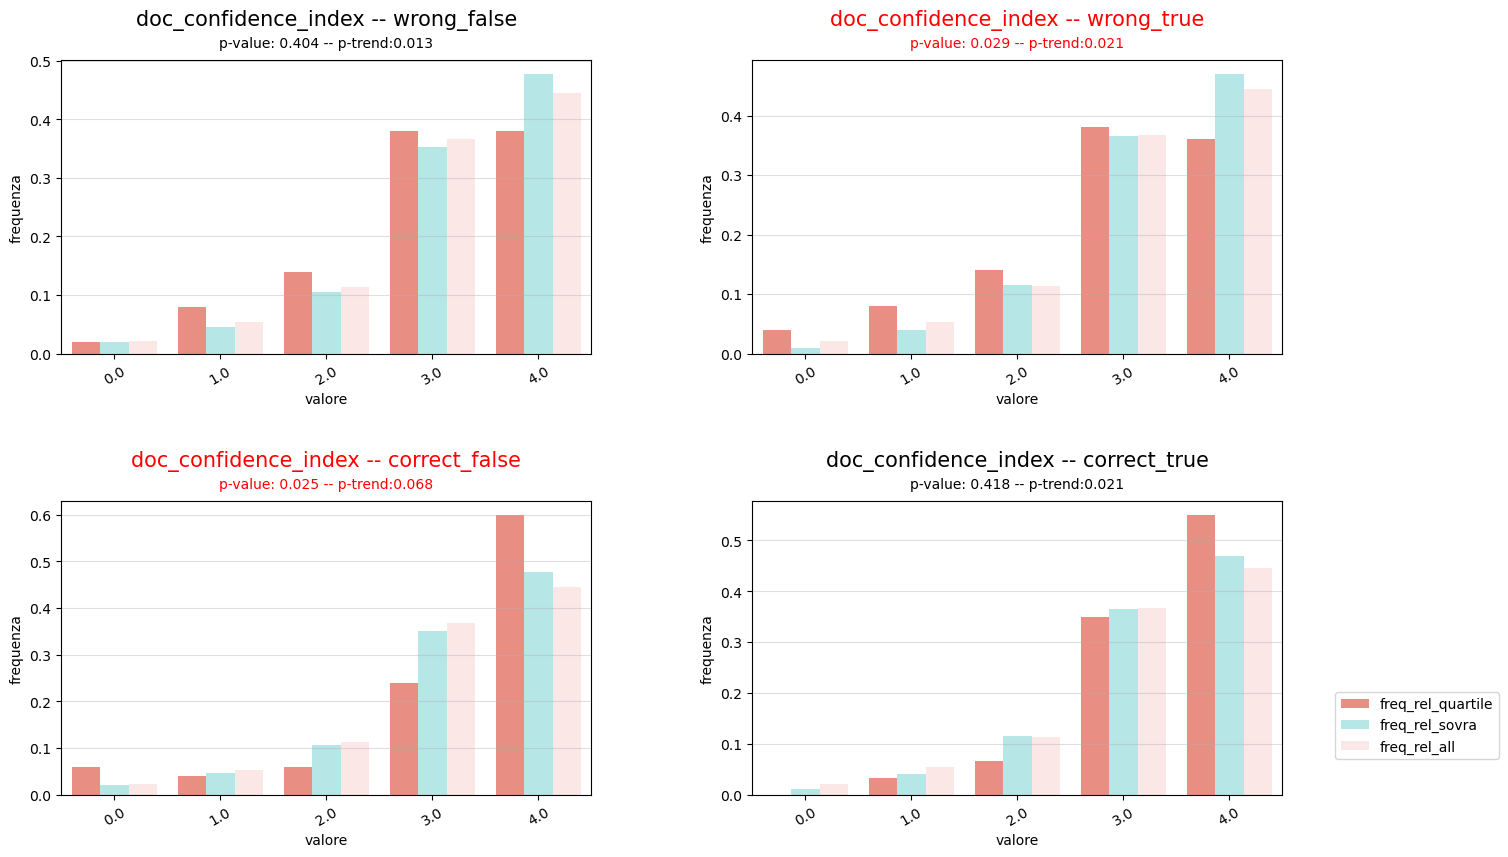

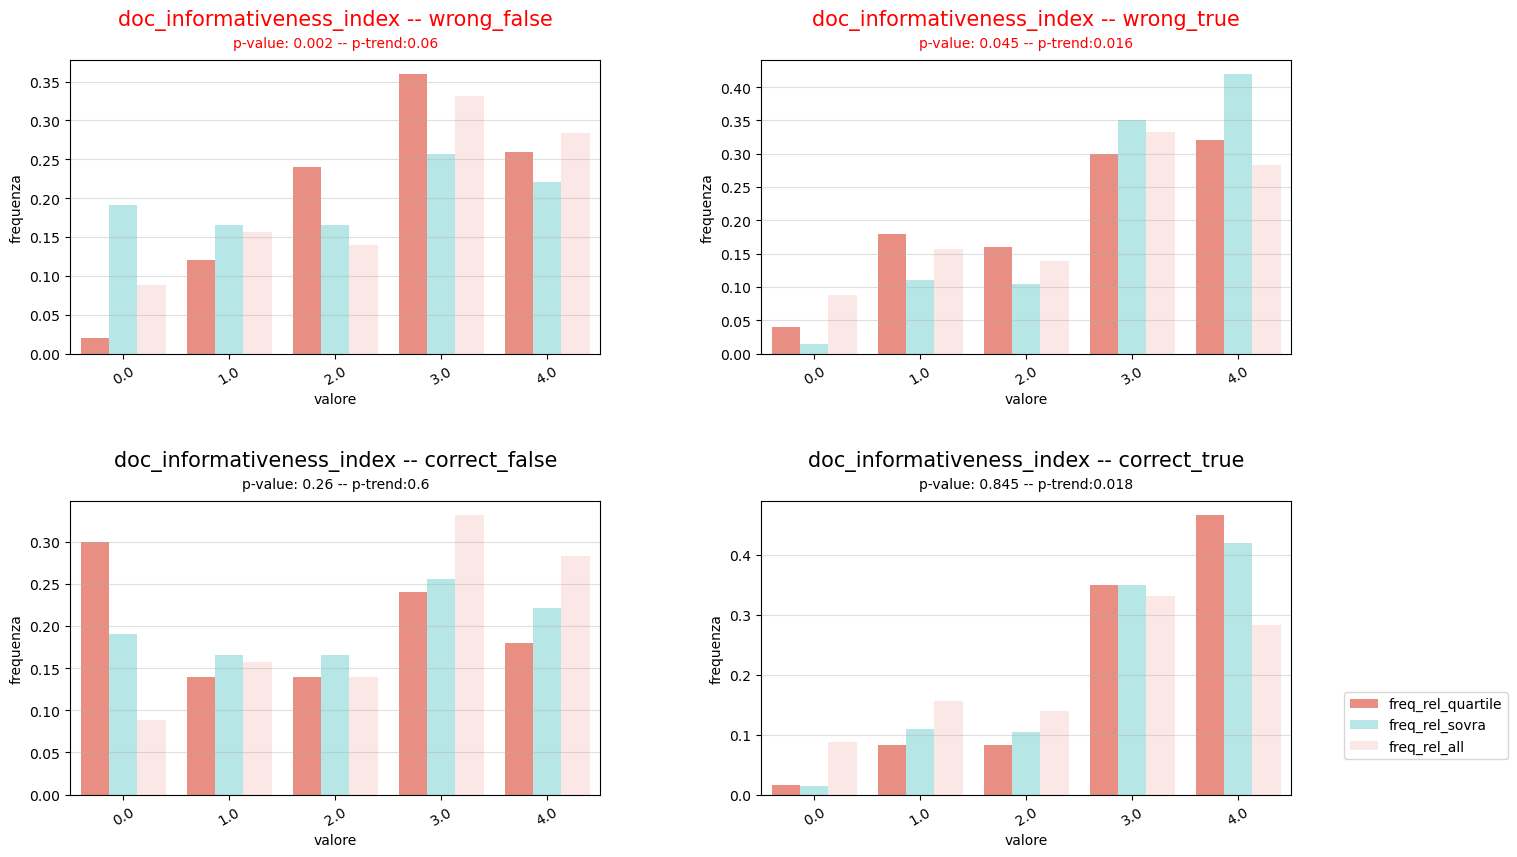

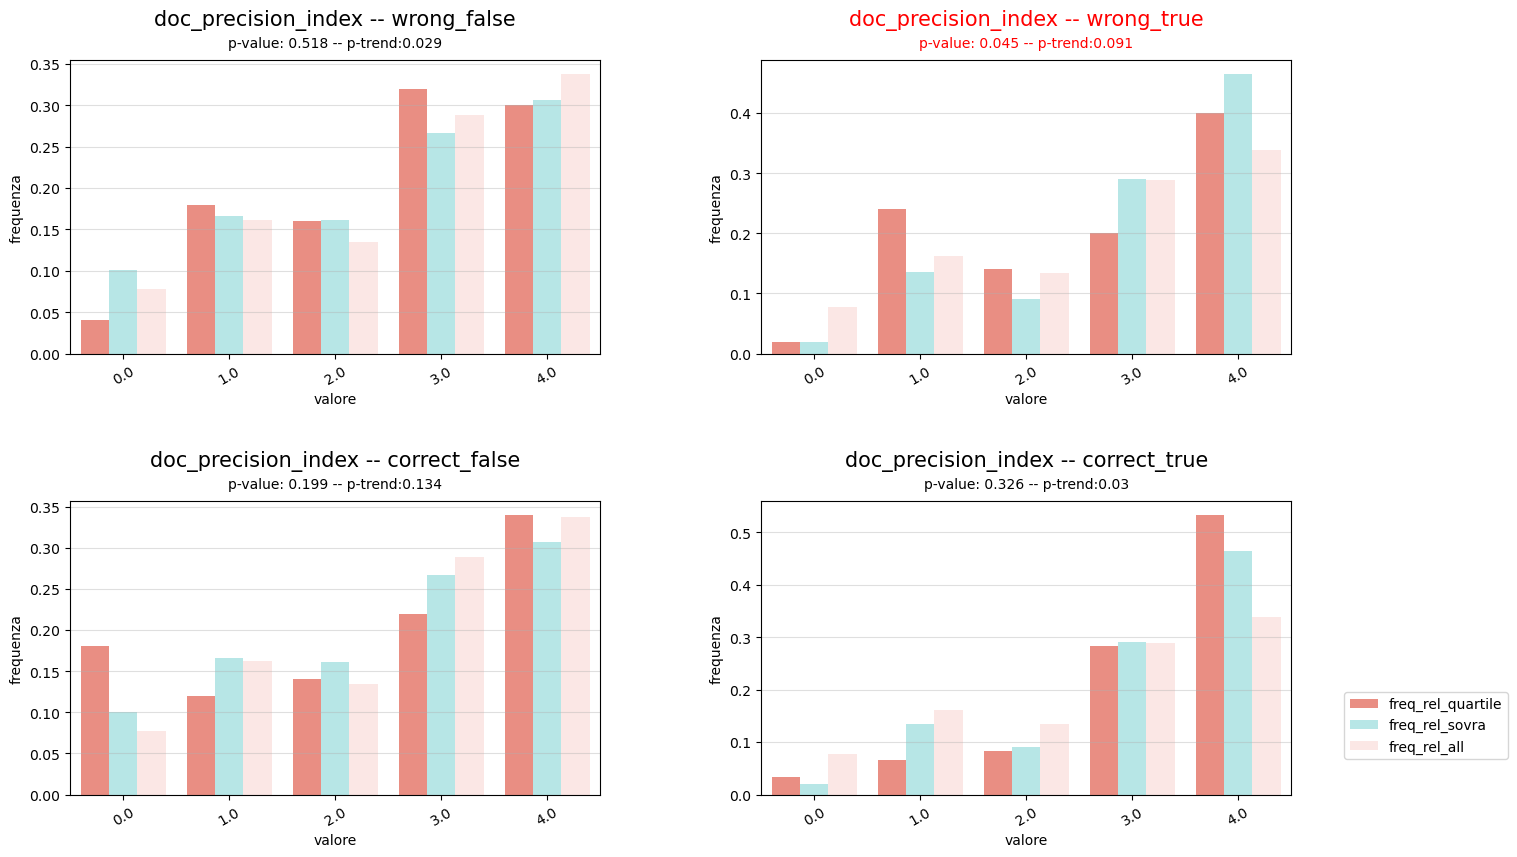

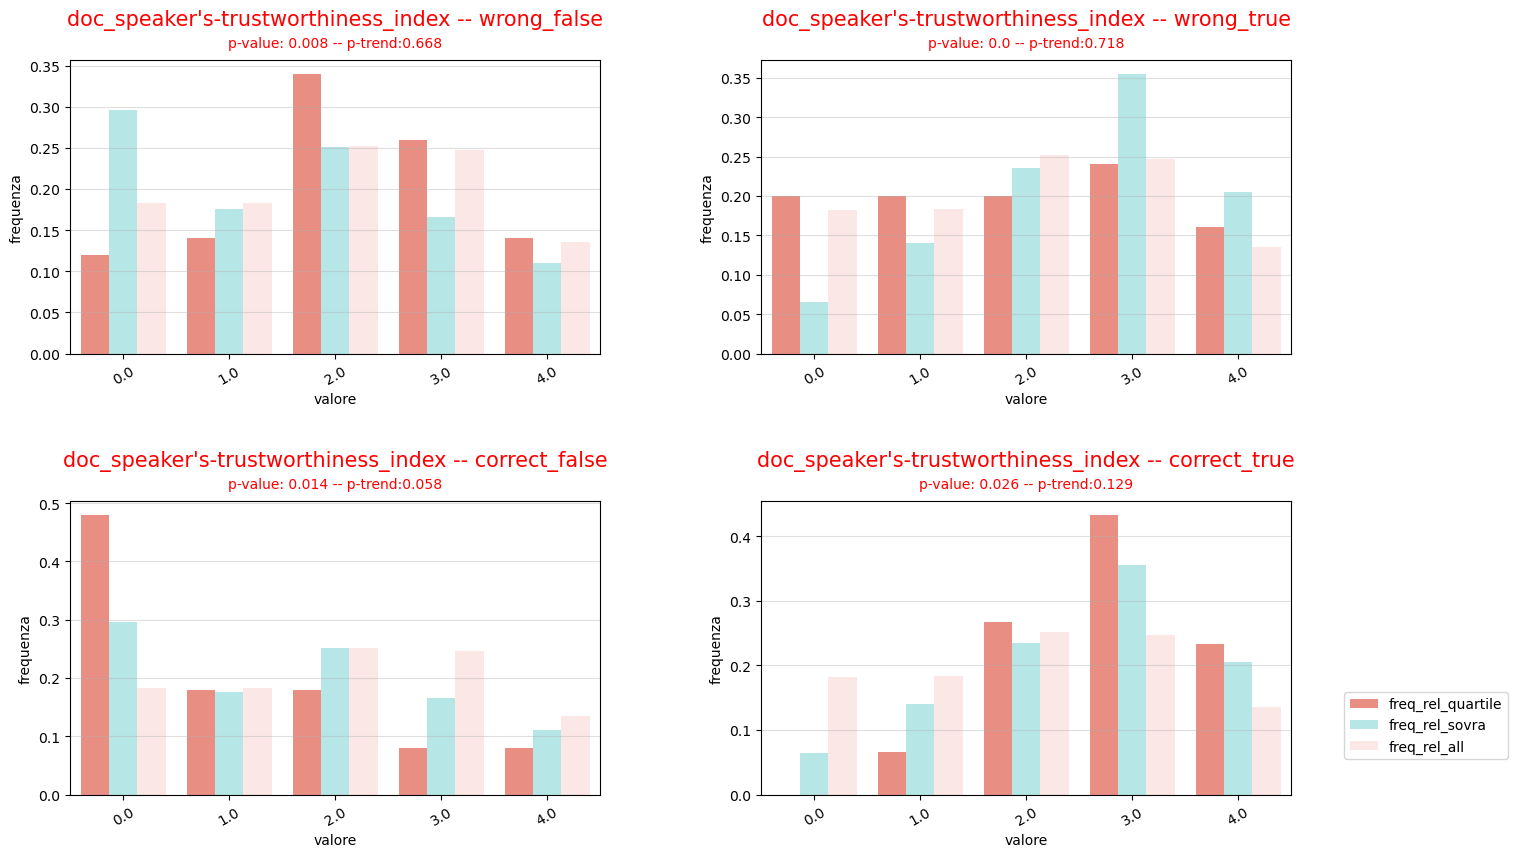

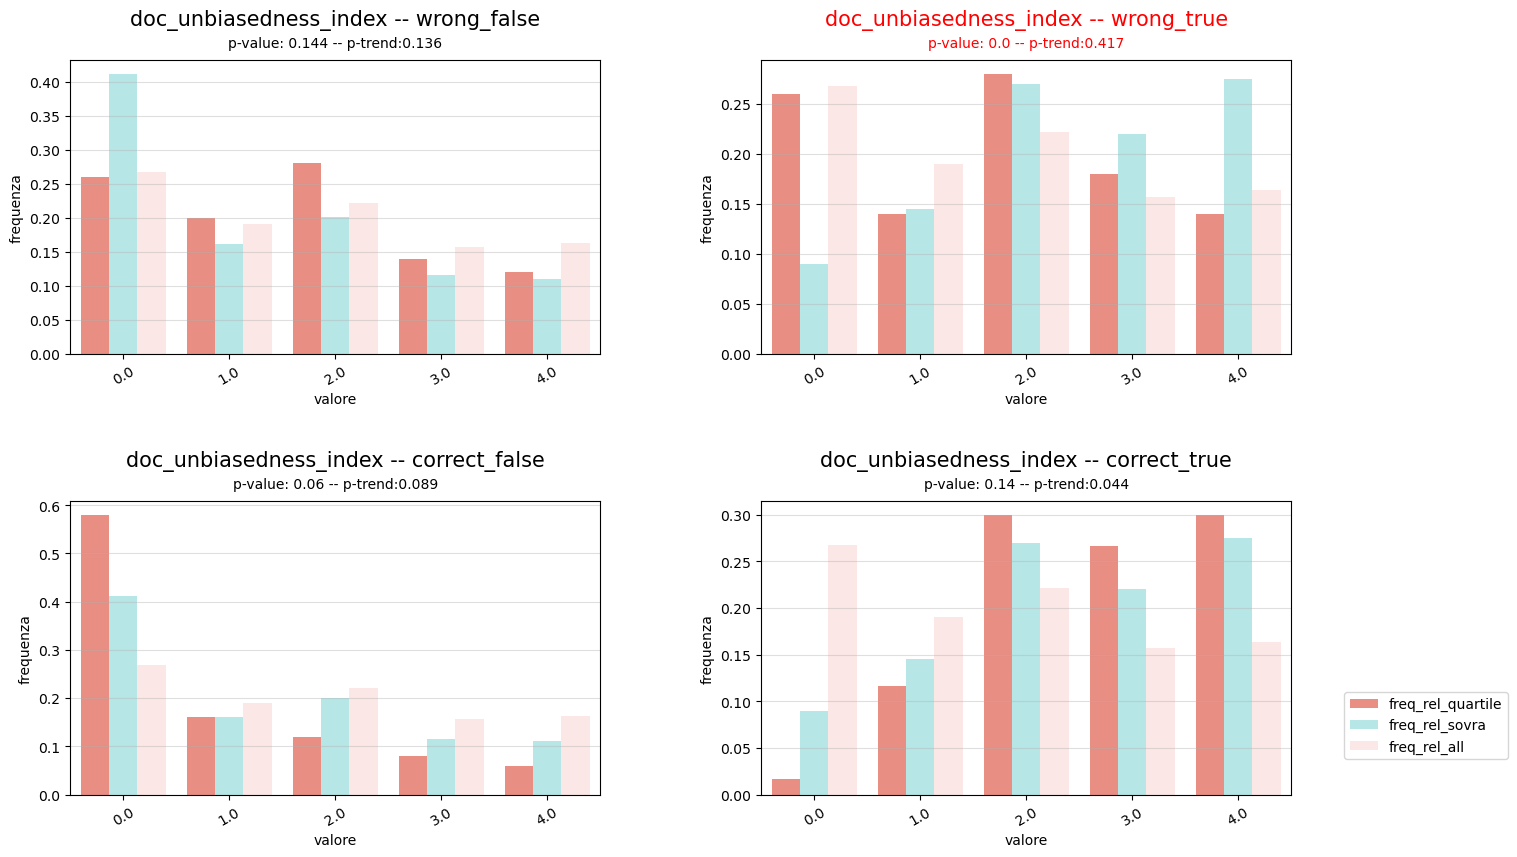

In [6]:
# solo significativi
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"valore")

## COnfronto gruppi

In [7]:
raccoglitore_dimensioni["doc_accuracy_index"]["correct_false"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
3,0.0,217,61,24,0.180984,0.306533,0.48
1,1.0,215,38,11,0.179316,0.190955,0.22
2,2.0,198,32,4,0.165138,0.160804,0.08
0,3.0,325,40,7,0.271059,0.201005,0.14
4,4.0,244,28,4,0.203503,0.140704,0.08


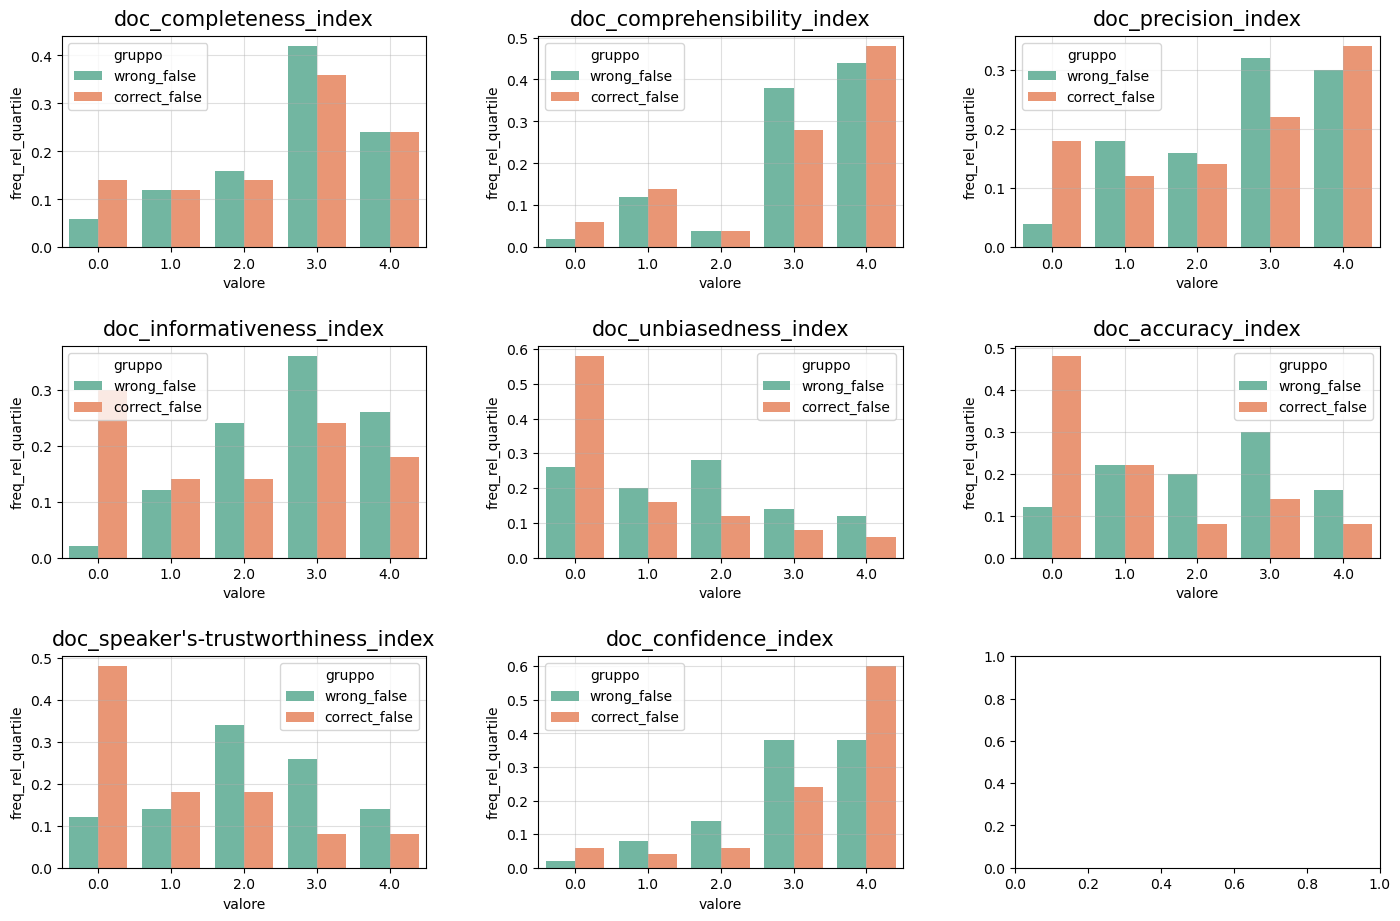

In [8]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False)

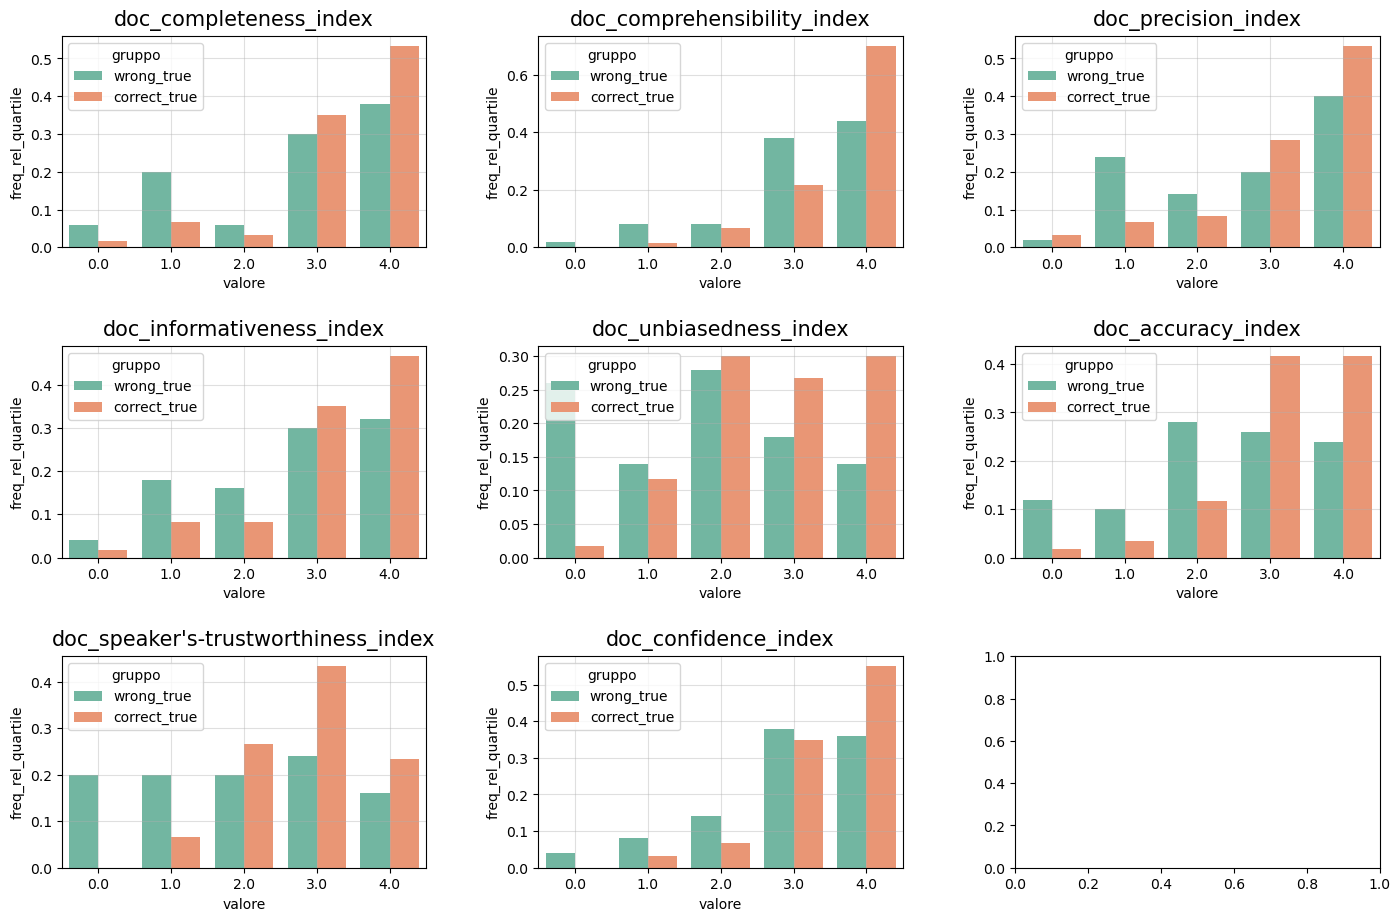

In [9]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False)

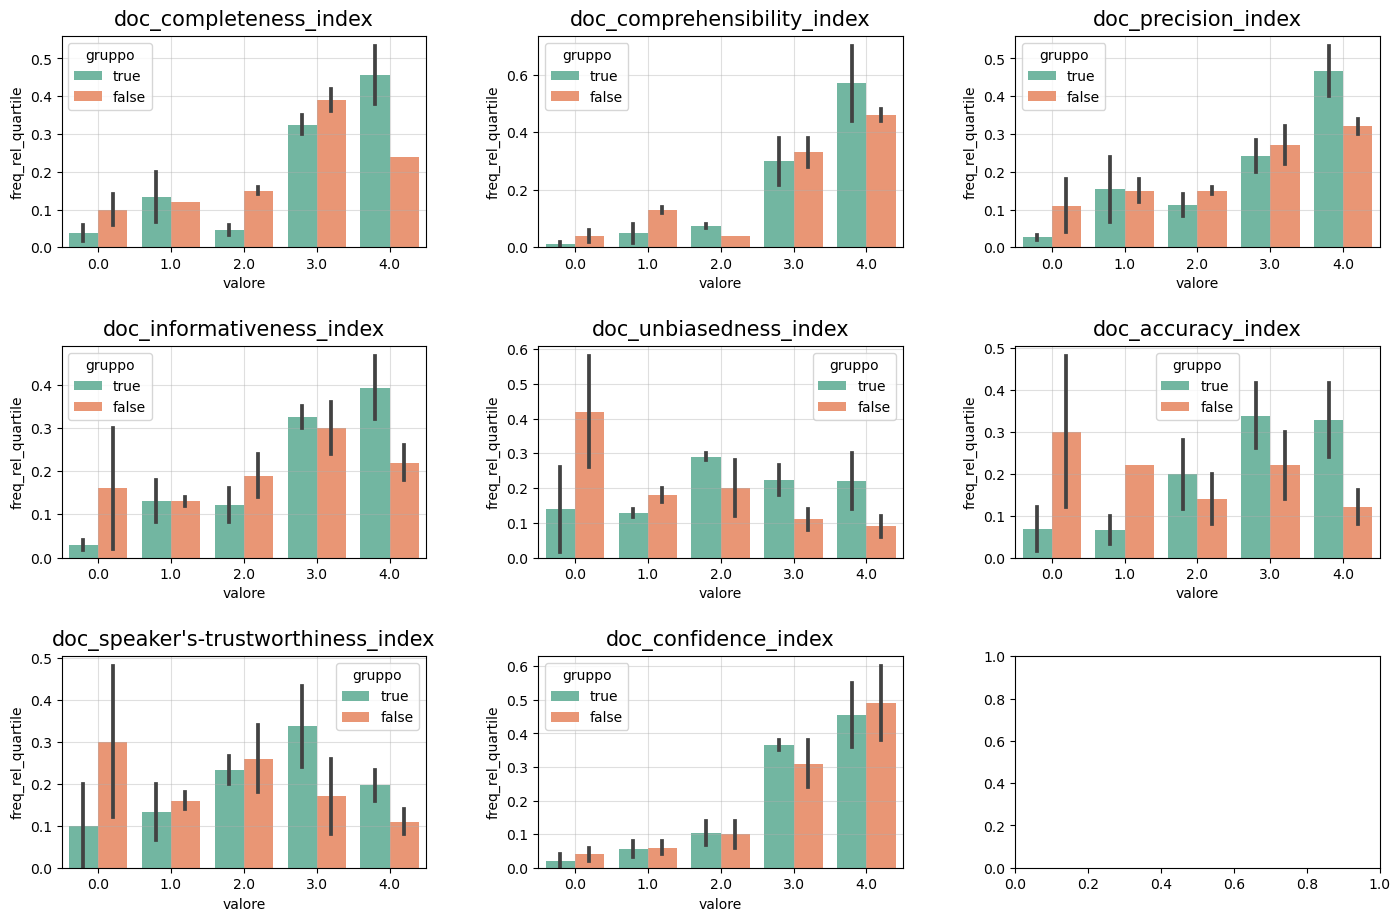

In [10]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["true","false"])

In [11]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

true doc_completeness_index 0.01551888902662775
false doc_completeness_index 0.010754339149312474
true doc_precision_index 0.01712140297472313
true doc_informativeness_index 0.017514878050111638
false doc_informativeness_index 0.02977444094426611
true doc_unbiasedness_index 0.00033173832353190774
false doc_unbiasedness_index 0.004979329604815454
true doc_accuracy_index 2.184129583904519e-06
false doc_accuracy_index 0.005247384831136464
true doc_speaker's-trustworthiness_index 0.002613678585753478
false doc_speaker's-trustworthiness_index 0.019706409021489426


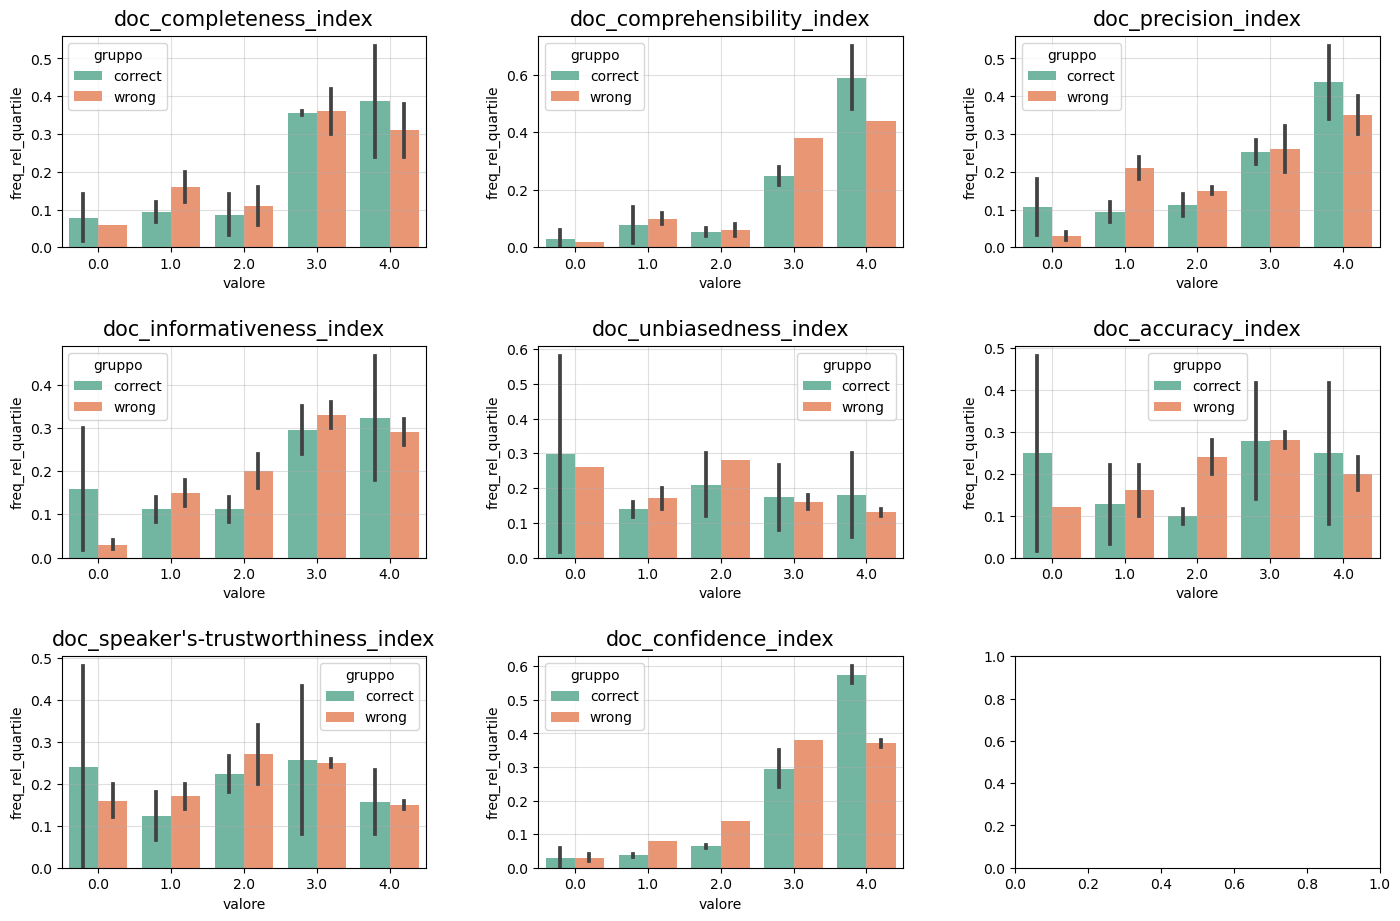

In [12]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["correct","wrong"])

In [13]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

correct doc_precision_index 0.04461882853379541


## Analisi Scarto

In [14]:
analizza_scarto(df_all,quartili,dimensioni_da_analizzare,solo_quartile_vs_sovra = False)

quartile vs all =>  doc_precision_index correct_true -> 1.3819121346411106e-06
quartile vs all =>  doc_informativeness_index correct_false -> 0.012350119551602505
quartile vs all =>  doc_informativeness_index correct_true -> 0.018702064613343724
quartile vs all =>  doc_unbiasedness_index correct_true -> 4.5622484945204806e-09
quartile vs all =>  doc_confidence_index correct_false -> 1.028309431426172e-09


## Regressione

In [15]:
dimensioni_da_analizzare = dimensioni_da_analizzare + ["doc_time_elapsed"]

In [16]:
df_all_con_medie = df_all.copy()

calcolo per ogni doc id la sua media per ciascun valore

In [17]:
for dimensione in dimensioni_da_analizzare:
    df_all_con_medie[dimensione[:-6]+"_mean"] = 0

for statement in df_all_con_medie["doc_id"].unique():
    for dim in dimensioni_da_analizzare:
        mean = np.asarray(df_all_con_medie[df_all_con_medie["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_all_con_medie.loc[df_all_con_medie["doc_id"] == statement, dim[:-6]+"_mean"] = mean 

doc_completeness_index


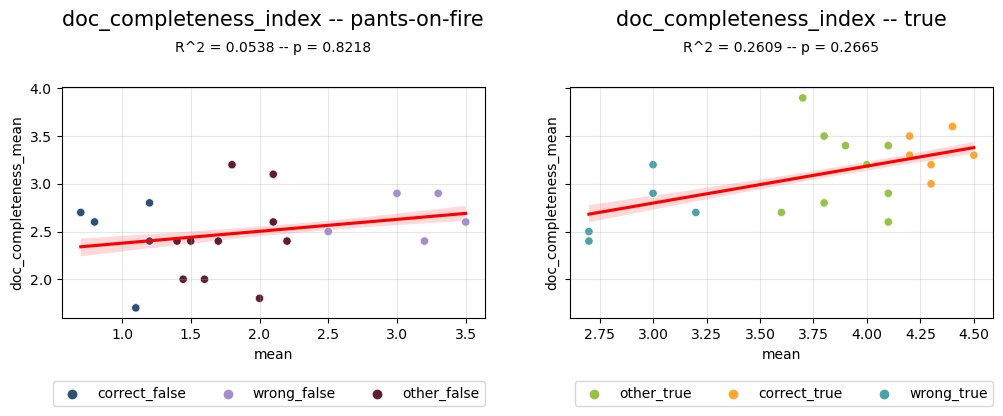

doc_comprehensibility_index


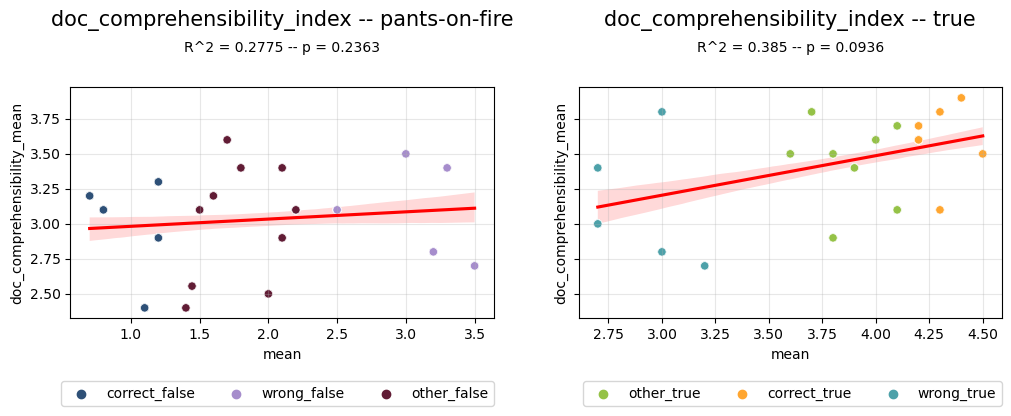

doc_precision_index


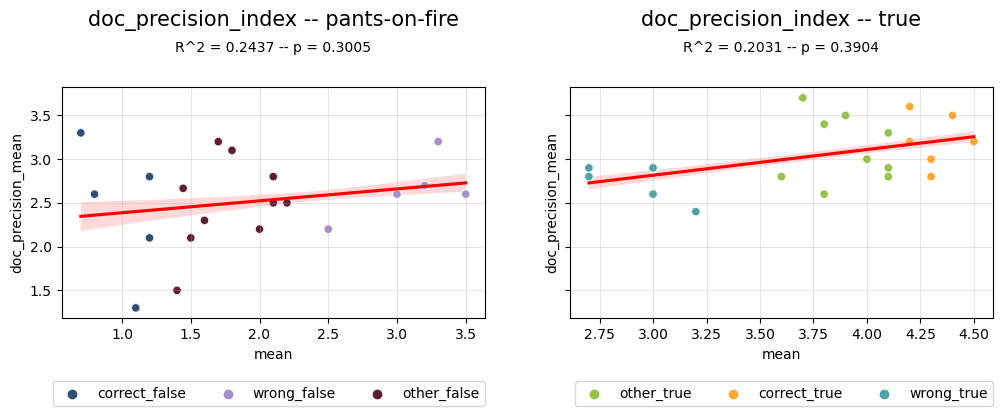

doc_informativeness_index


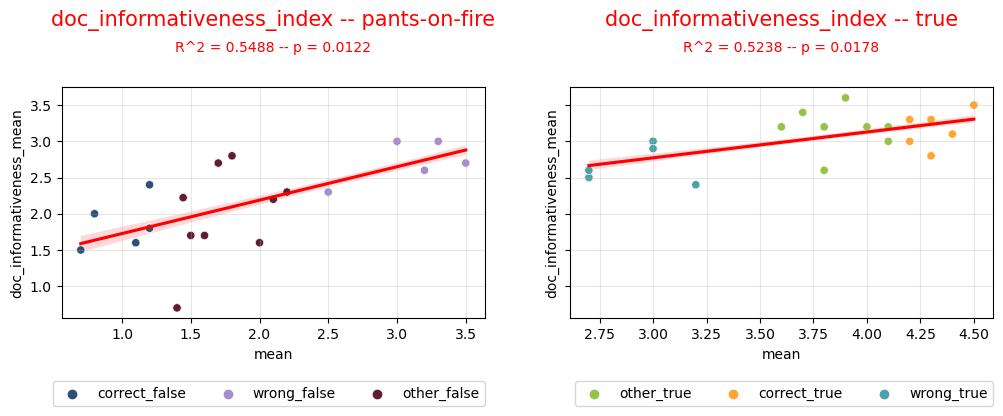

doc_unbiasedness_index


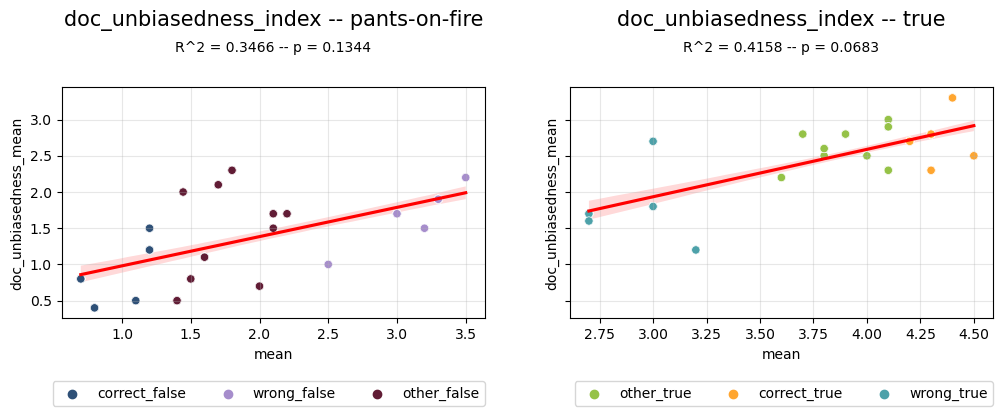

doc_accuracy_index


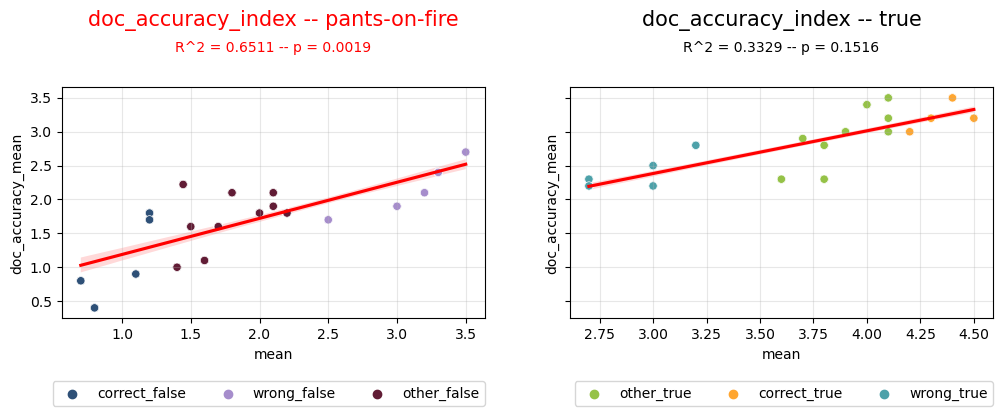

doc_speaker's-trustworthiness_index


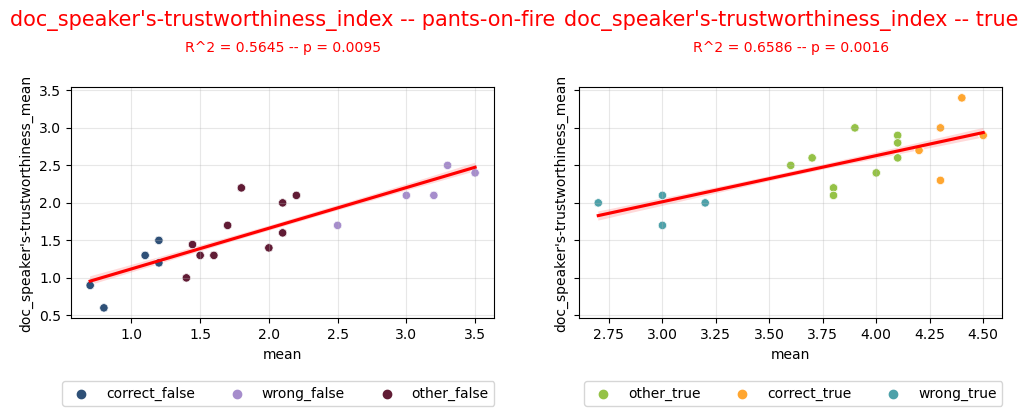

doc_confidence_index


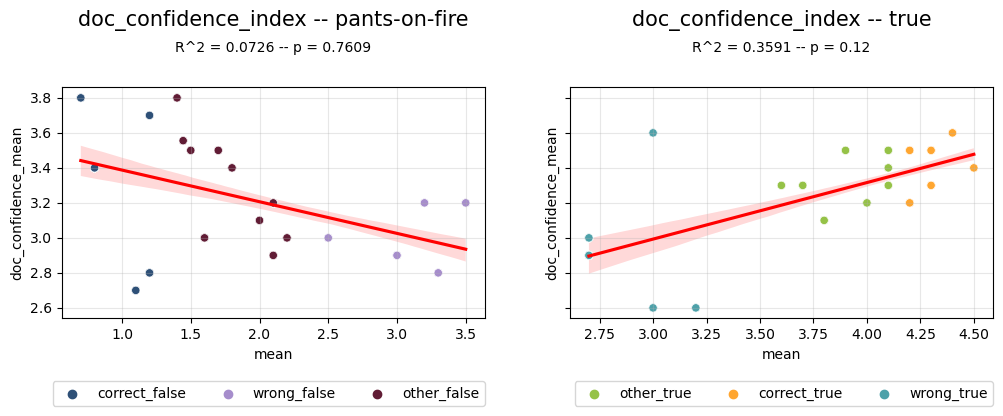

doc_time_elapsed


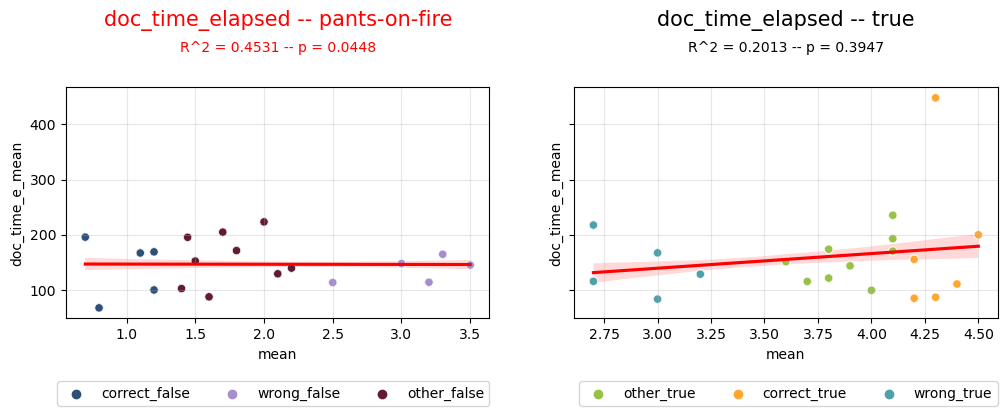

In [18]:
plot_regressione_lineare_RQ(df_all_con_medie,dimensioni_da_analizzare,6)

# Analisi medie

In [19]:
dimensioni_da_analizzare_con_mean = [dim[:-6]+"_mean" for dim in dimensioni_da_analizzare] + ["doc_time_e_mean"]

In [20]:
dimensioni_da_analizzare_con_mean

['doc_completeness_mean',
 'doc_comprehensibility_mean',
 'doc_precision_mean',
 'doc_informativeness_mean',
 'doc_unbiasedness_mean',
 'doc_accuracy_mean',
 "doc_speaker's-trustworthiness_mean",
 'doc_confidence_mean',
 'doc_time_e_mean',
 'doc_time_e_mean']

In [21]:
# verifico se son tutti uguali => poichè son tutti uguali posso fare drop_by_doc_id
for doc_id in df_all_con_medie["doc_id"].unique():
    for dim in dimensioni_da_analizzare_con_mean:
        if len(df_all_con_medie[df_all_con_medie["doc_id"] == doc_id][dim].unique()) > 1:
            print(doc_id, dim)
    if len(df_all_con_medie[df_all_con_medie["doc_id"] == doc_id]["quartile"].unique()) > 1:
        print(doc_id,df_all_con_medie[df_all_con_medie["doc_id"] == doc_id]["quartile"].unique())


In [22]:
# elimino le righe duplicate
df_all_con_medie_analisi = df_all_con_medie.copy()
df_all_con_medie_analisi = df_all_con_medie_analisi.drop_duplicates(subset=["doc_id"])

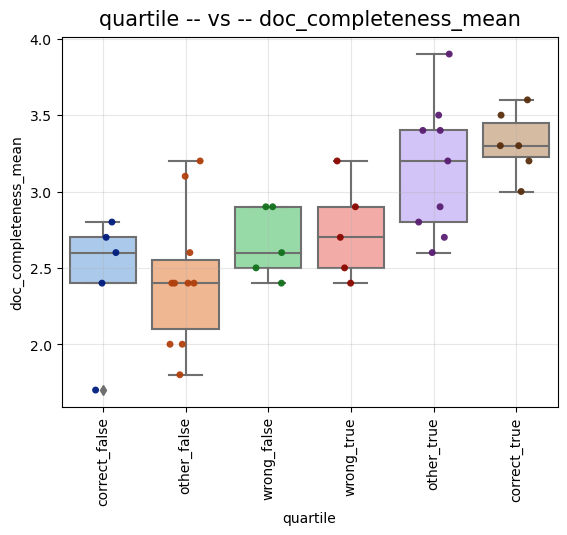

['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.023


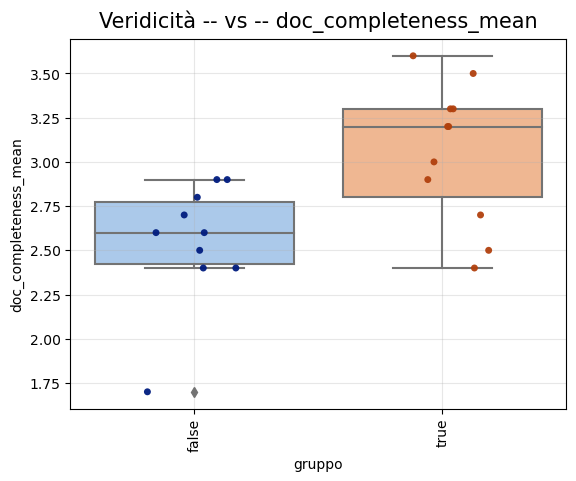

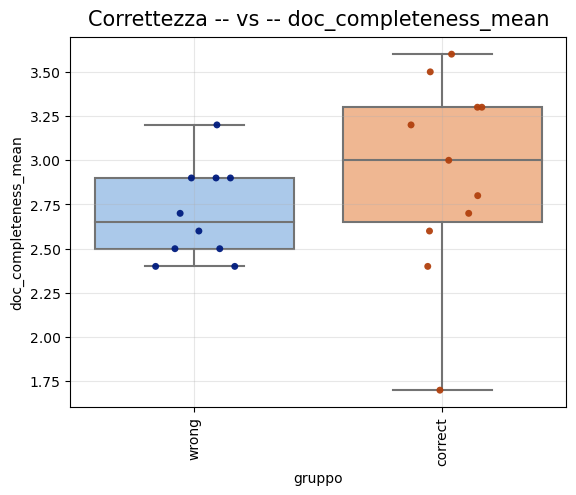

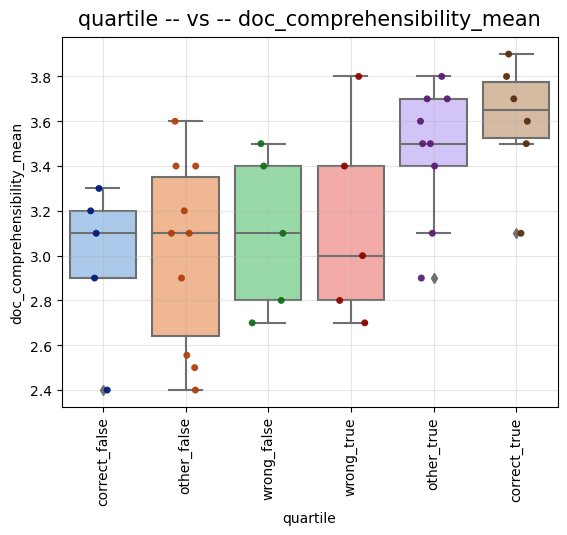

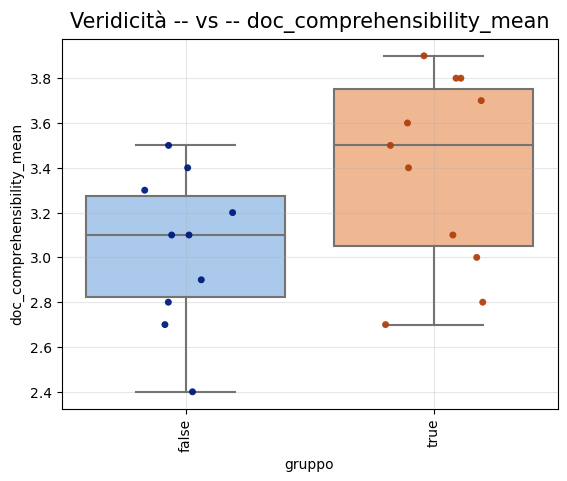

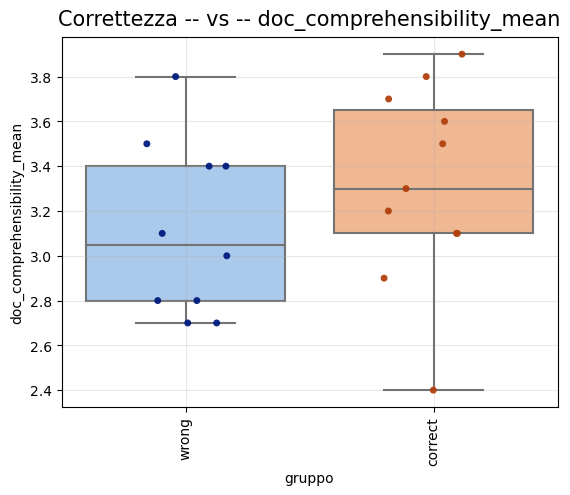

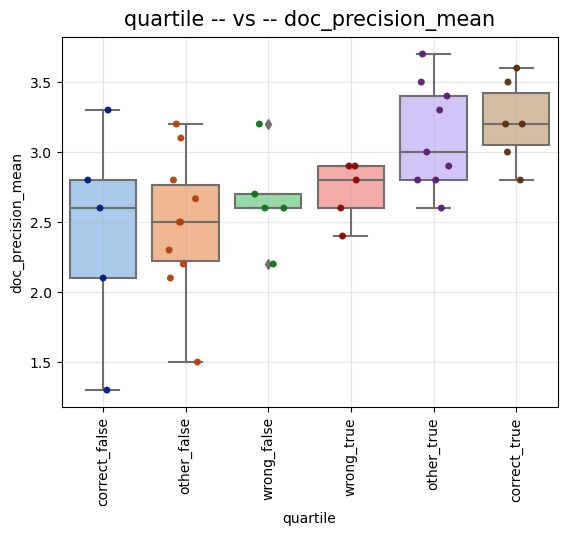

['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.028


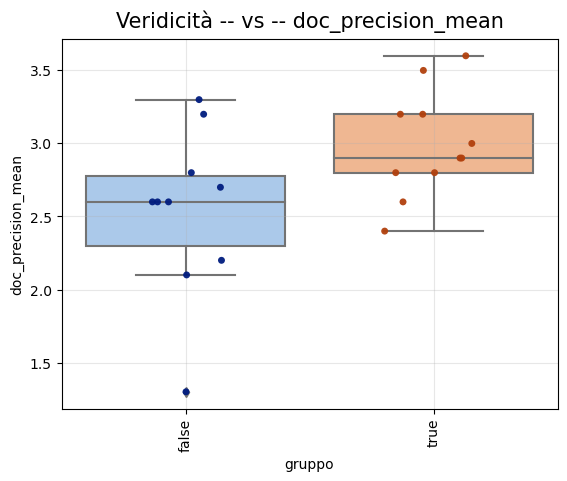

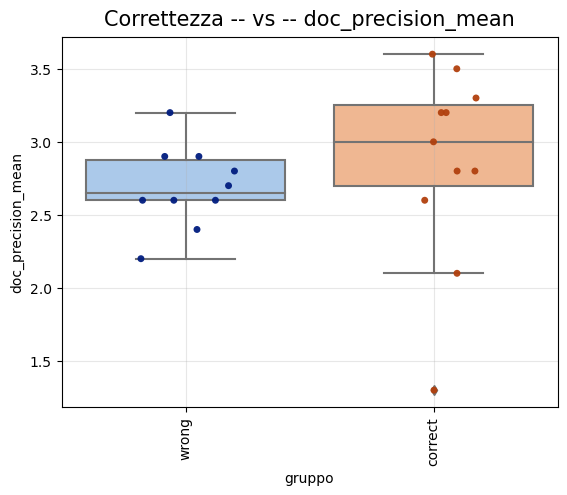

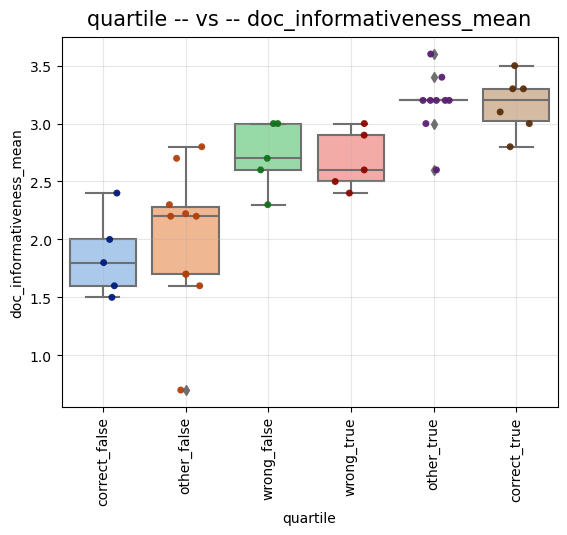

['wrong_false'] ['correct_false' 'other_false'] --> pvalue: 0.009
['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.005


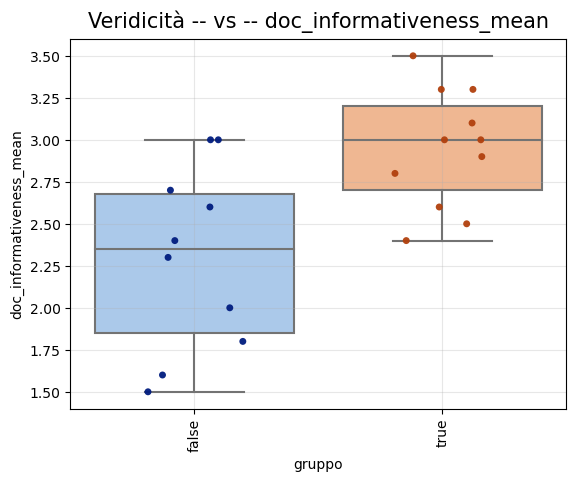

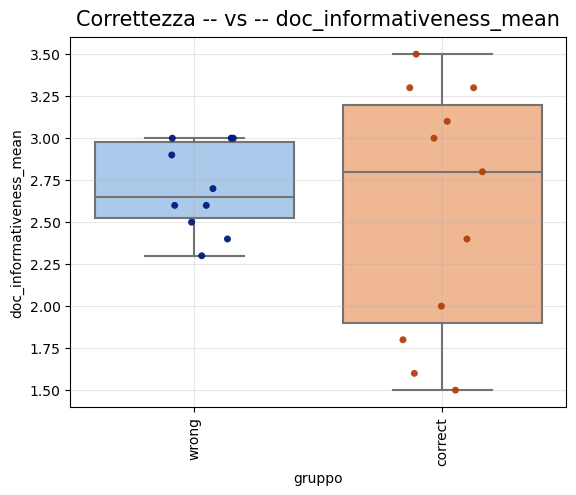

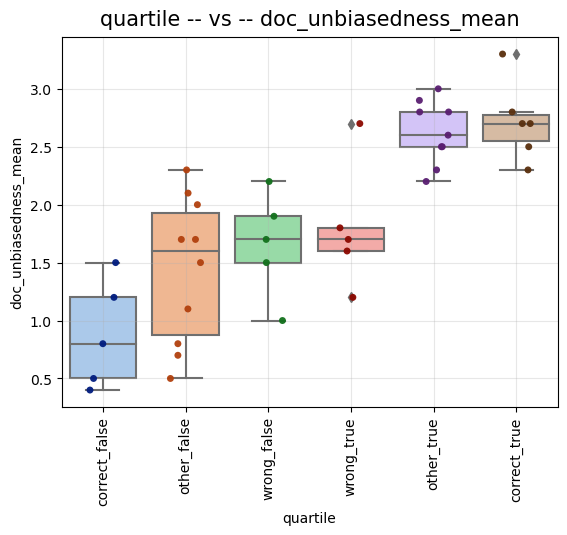

['correct_false'] ['wrong_false' 'other_false'] --> pvalue: 0.044
['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.011


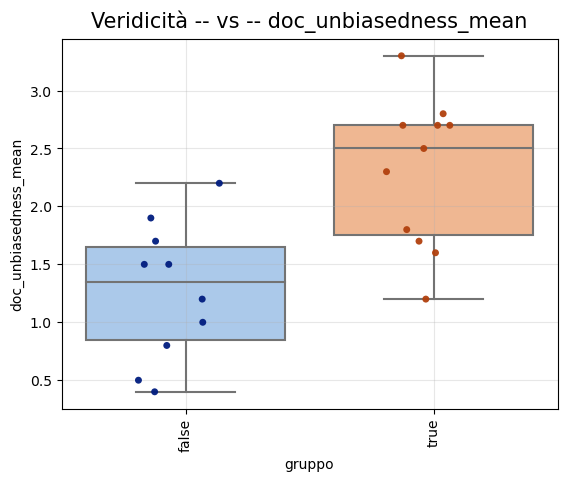

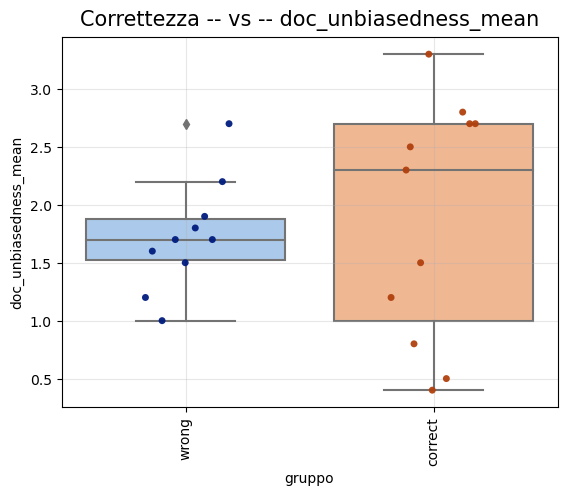

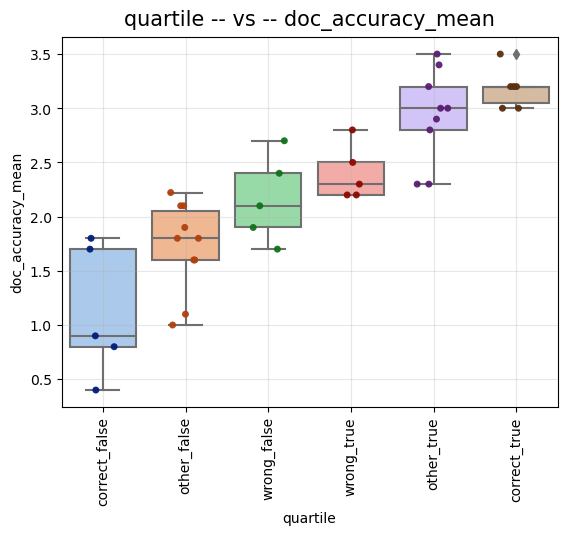

['wrong_false'] ['correct_false' 'other_false'] --> pvalue: 0.035
['correct_false'] ['wrong_false' 'other_false'] --> pvalue: 0.02
['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.005
['correct_true'] ['other_true' 'wrong_true'] --> pvalue: 0.034


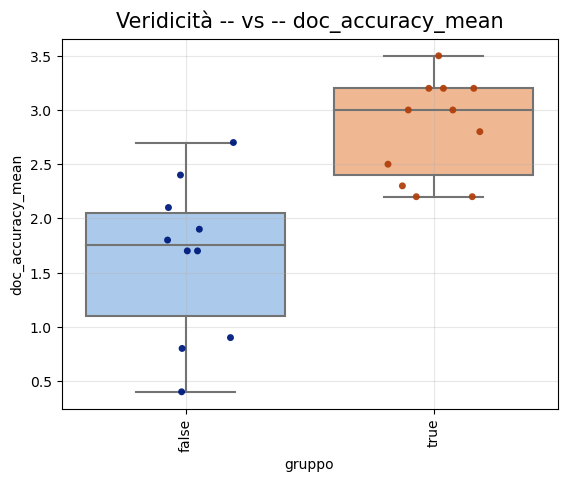

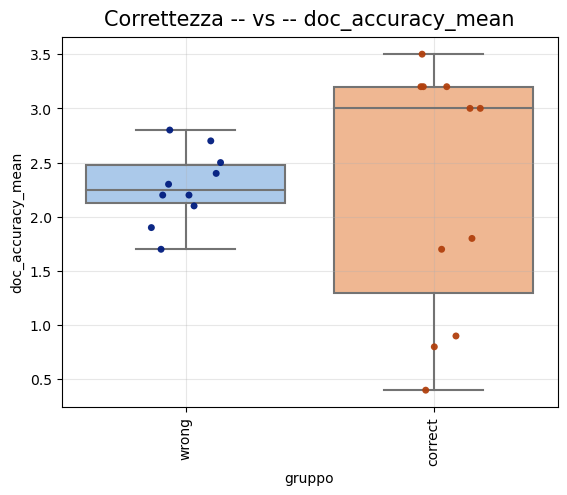

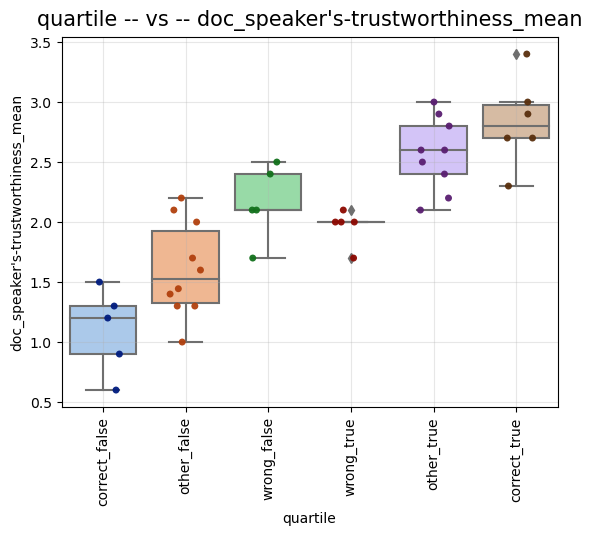

['wrong_false'] ['correct_false' 'other_false'] --> pvalue: 0.008
['correct_false'] ['wrong_false' 'other_false'] --> pvalue: 0.011
['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.001
['correct_true'] ['other_true' 'wrong_true'] --> pvalue: 0.028


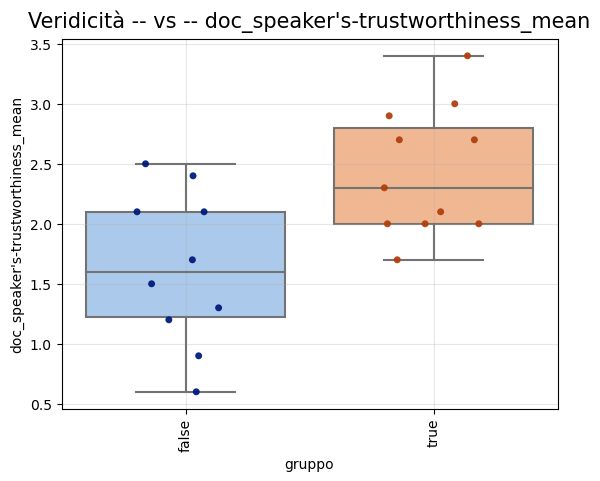

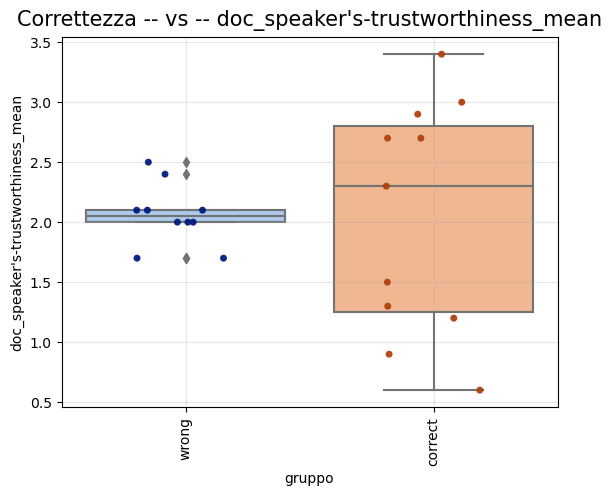

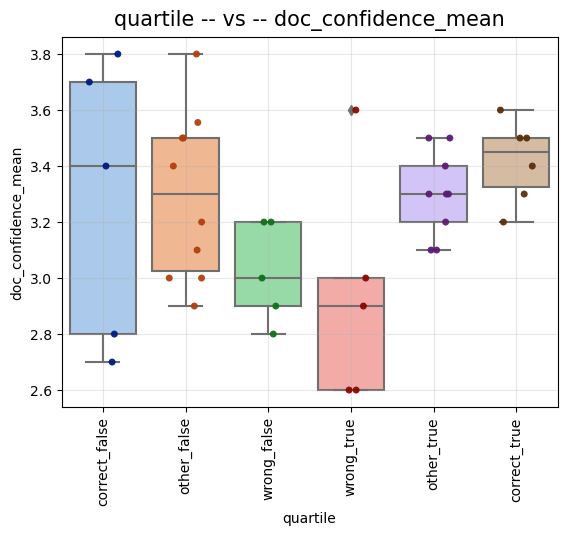

['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.047


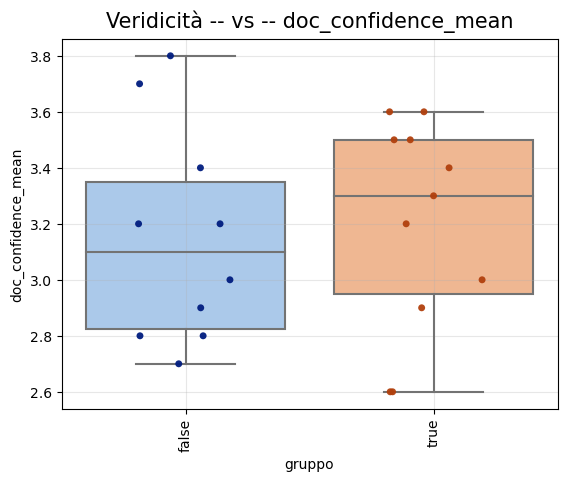

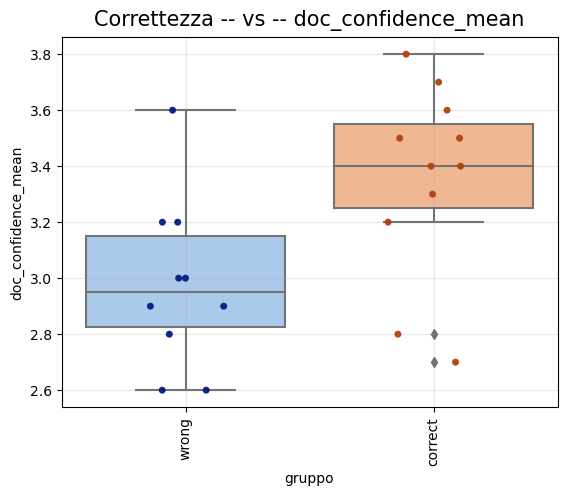

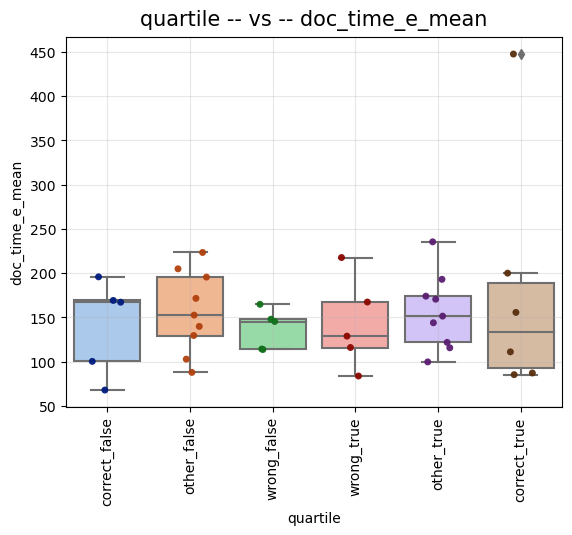

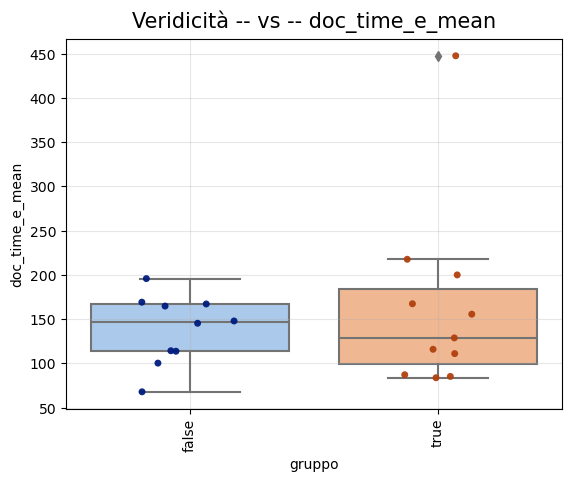

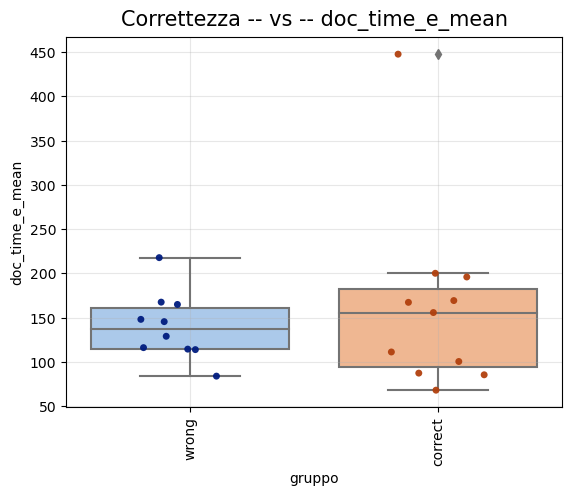

In [23]:
for dimensione in dimensioni_da_analizzare:
    # all
    crea_boxplot_e_stripplot(df_all_con_medie_analisi, "quartile", dimensione[:-6]+"_mean")
    calcola_test_mann(df_all_con_medie_analisi, dimensione[:-6]+"_mean",quartili, solo_significativi = True)
    # con raggruppamenti
    crea_boxplot_e_stripplot(df_all_con_medie_analisi, "quartile", dimensione[:-6]+"_mean", gruppi = [["wrong_false", "correct_false"],["wrong_true", "correct_true"]],labels = ["false","true"],titolo = "Veridicità")
    crea_boxplot_e_stripplot(df_all_con_medie_analisi, "quartile", dimensione[:-6]+"_mean",gruppi = [["wrong_false", "wrong_true"],["correct_true", "correct_false"]],labels = ["wrong","correct"],titolo = "Correttezza")

## Analisi tempo impiegato

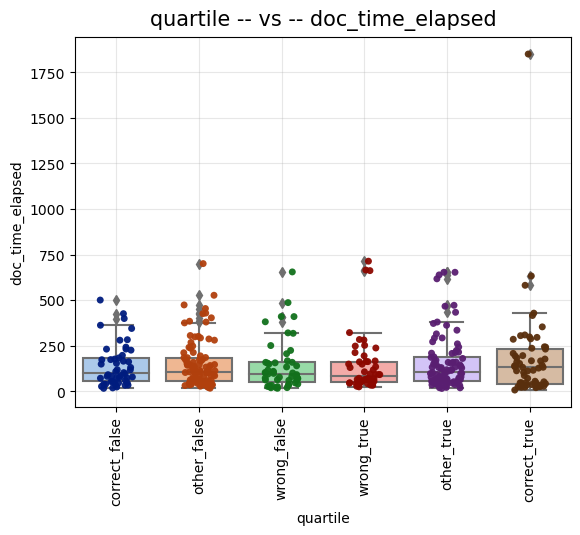

In [24]:
crea_boxplot_e_stripplot(df_all, "quartile", "doc_time_elapsed")

In [25]:
# calcolo media
for quartile in quartili:
    print(quartile,df_all[df_all["quartile"] == quartile]["doc_time_elapsed"].mean())

wrong_false 137.2924
correct_false 140.14579999999998
wrong_true 142.79160000000002
correct_true 181.1895


In [26]:
calcola_test_mann(df_all, "doc_time_elapsed",quartili)

['wrong_false'] ['correct_false' 'other_false'] --> pvalue:  nan
['correct_false'] ['wrong_false' 'other_false'] --> pvalue:  nan
['wrong_true'] ['other_true' 'correct_true'] --> pvalue:  0.44872569755960856
['correct_true'] ['other_true' 'wrong_true'] --> pvalue:  0.8929038122106253


Notiamo che ci sono molti outliers

In [27]:
all_index_to_remove = []
for quartile in quartili:
    
    df = df_all.copy()
    df = df[df["quartile"] == quartile]

    time = df['doc_time_elapsed']
    
    removed_outliers = time.between(time.quantile(.05), time.quantile(.95))
    
    index_names = df[~removed_outliers].index # INVERT removed_outliers!!
    
    for index in index_names:
        all_index_to_remove.append(index)
    
    df.drop(index_names, inplace=True)


<Axes: xlabel='quartile', ylabel='doc_time_elapsed'>

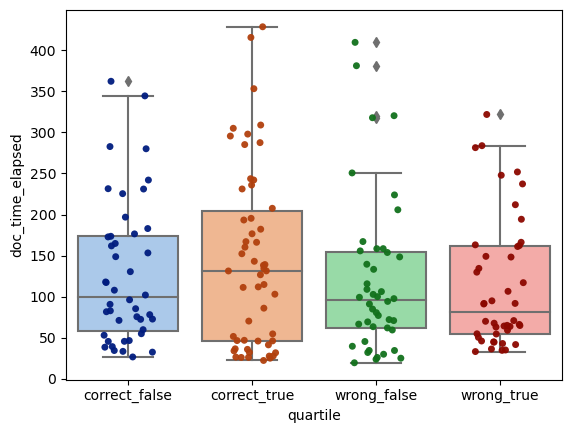

In [28]:
df = df_all.copy()
df.drop(all_index_to_remove, inplace=True)
df = df[(df["quartile"] != "other") & (df["quartile"] != "other_true") & (df["quartile"] != "other_false")]

sns.boxplot(palette = "pastel",x="quartile", y="doc_time_elapsed", data=df)
sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jitter=0.2, size=5, alpha=0.95)
    

In [29]:
calcola_test_mann(df, "doc_time_elapsed",quartili)

['wrong_false'] ['correct_false'] --> pvalue:  0.42546382801883764
['correct_false'] ['wrong_false'] --> pvalue:  0.42546382801883764
['wrong_true'] ['correct_true'] --> pvalue:  0.49517062659851285
['correct_true'] ['wrong_true'] --> pvalue:  0.49517062659851285


usando questi dati ricalcolo la regressione:

In [30]:
df = df_all.copy()
df.drop(all_index_to_remove, inplace=True)
df = df[(df["quartile"] != "other") ]

In [31]:
dimensioni_da_analizzare = ["doc_time_elapsed"]

for dimensione in dimensioni_da_analizzare:
    df[dimensione[:-6]+"_mean"] = 0

for statement in df["doc_id"].unique():
    for dim in dimensioni_da_analizzare:
        mean = np.asarray(df[df["doc_id"] == statement][dim],dtype = np.float64).mean()
        df.loc[df_all_con_medie["doc_id"] == statement, dim[:-6]+"_mean"] = mean 

doc_time_elapsed


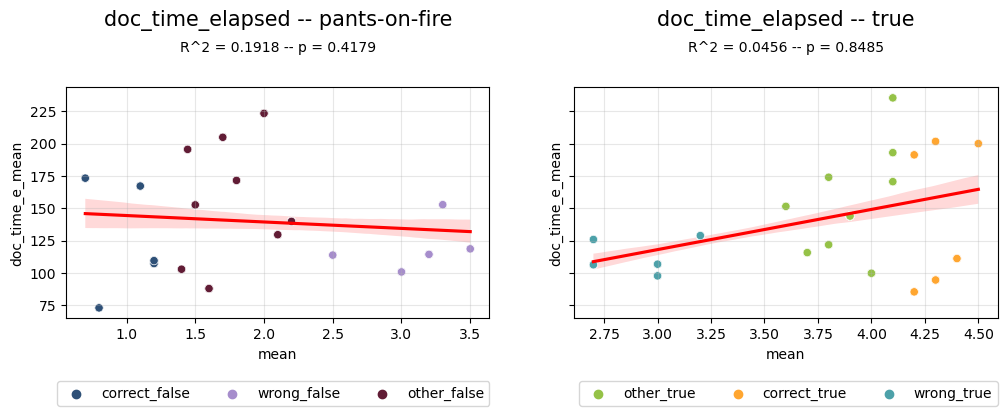

In [32]:
plot_regressione_lineare_RQ(df,["doc_time_elapsed"],6)

## Salvo DataFrame

In [33]:
df.to_csv(index=False, path_or_buf = "../Datasets/df_Q3.csv")